# Retention Model

## Here we will build the decision tree to analyze if vendor-customer experience variables affect the retention of customers

In [11]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from IPython.display import display
sb.set() # set the default Seaborn style for graphics

finaldata = pd.read_csv('finaldata.csv')

## Exploratory Analysis

### Perform statistical exploration and visualization on the retained dataframe

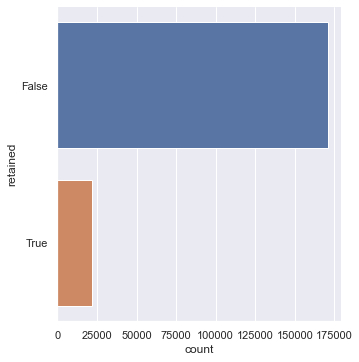

In [2]:
sb.catplot(y = 'retained', data = finaldata, kind = "count")

In [3]:
countY, countX = finaldata.retained.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)
print("Large imbalance between the classes")

Ratio of classes is Y : N =  170874 : 21887
Large imbalance between the classes


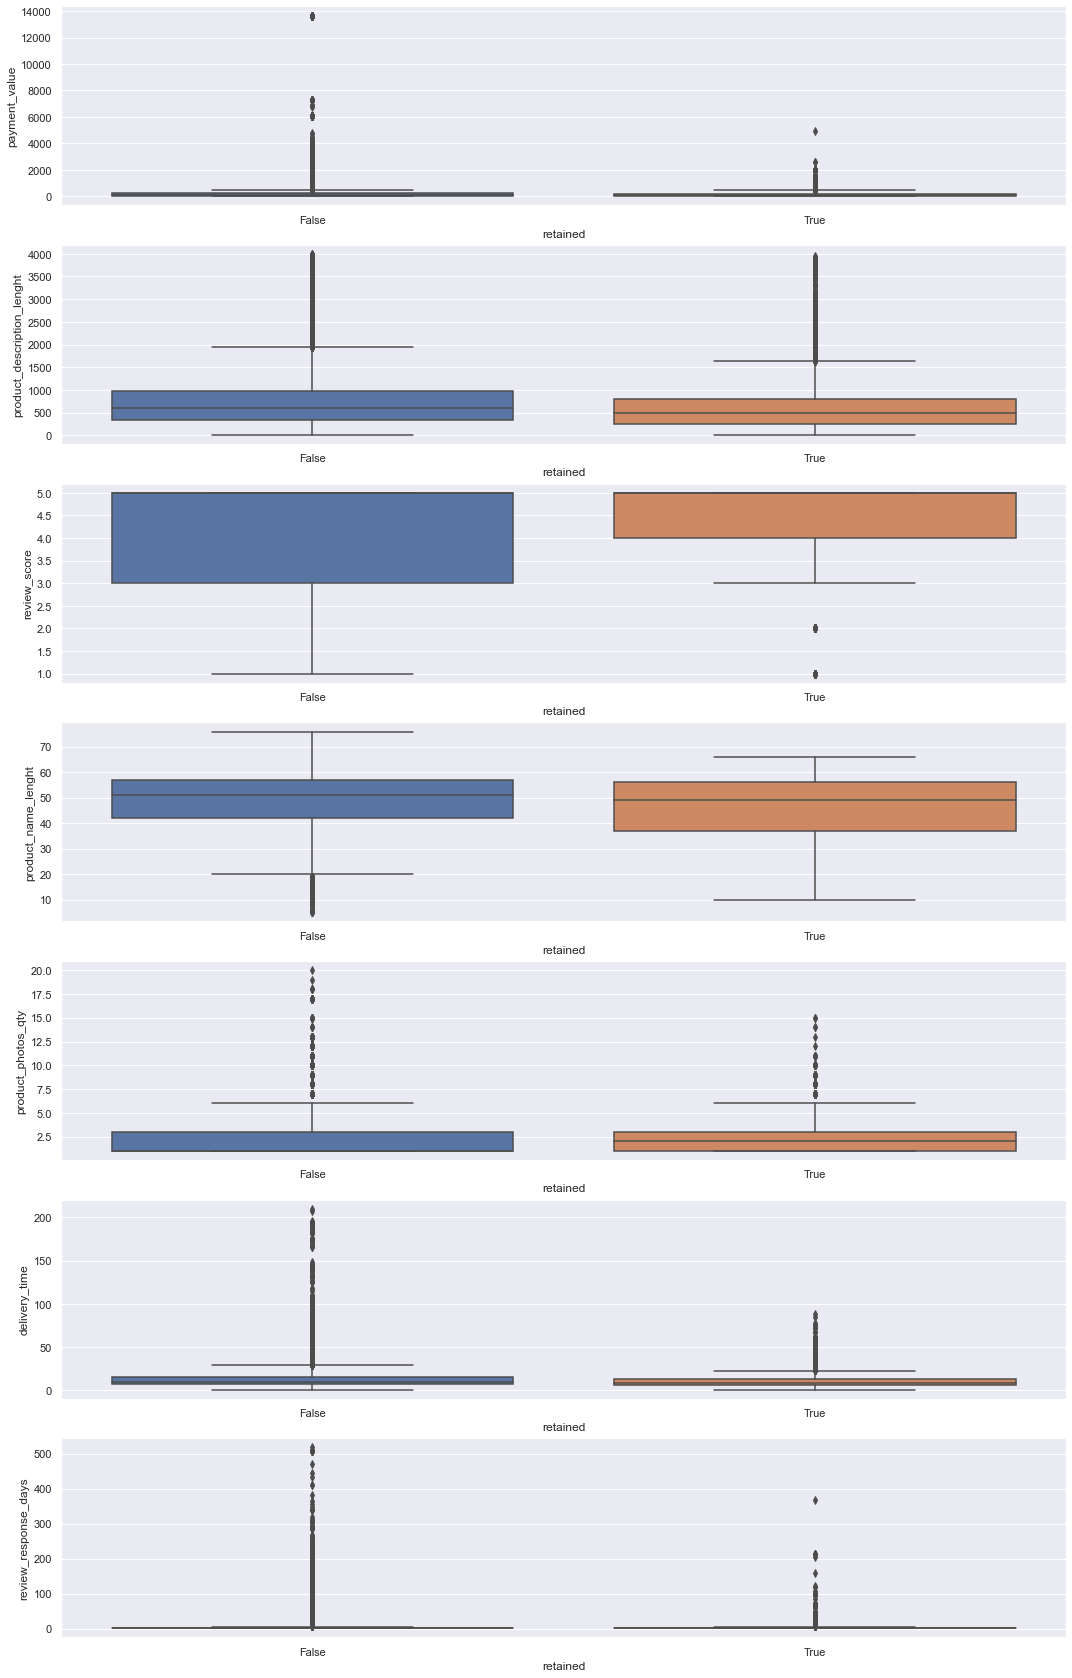

In [6]:
# Basic statistical plots
l= ['payment_value','product_description_lenght','review_score','product_name_lenght','product_photos_qty','delivery_time','review_response_days']
f, axes = plt.subplots(7, 1, figsize=(18, 30))
count = 0
for a in l:
    sb.boxplot(y = a, x = 'retained', data = finaldata,ax=axes[count])
    count+=1

## Lets create a classification tree to find which variable is most important in impacting the Churn (retained = True/False) of a customer

[Text(669.6, 1141.5600000000002, 'product_description_lenght <= 86.5\ngini = 0.211\nsamples = 108686\nvalue = [95691, 12995]\nclass = False'),
 Text(334.8, 815.4000000000001, 'product_description_lenght <= 85.5\ngini = 0.459\nsamples = 3289\nvalue = [1174, 2115]\nclass = True'),
 Text(167.4, 489.24, 'payment_value <= 1.315\ngini = 0.184\nsamples = 1286\nvalue = [1154, 132]\nclass = False'),
 Text(83.7, 163.07999999999993, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = True'),
 Text(251.10000000000002, 163.07999999999993, 'gini = 0.179\nsamples = 1280\nvalue = [1153, 127]\nclass = False'),
 Text(502.20000000000005, 489.24, 'payment_value <= 21.735\ngini = 0.02\nsamples = 2003\nvalue = [20, 1983]\nclass = True'),
 Text(418.5, 163.07999999999993, 'gini = 0.0\nsamples = 1982\nvalue = [0, 1982]\nclass = True'),
 Text(585.9, 163.07999999999993, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = False'),
 Text(1004.4000000000001, 815.4000000000001, 'product_photos_qty <= 7.5\ngini = 0

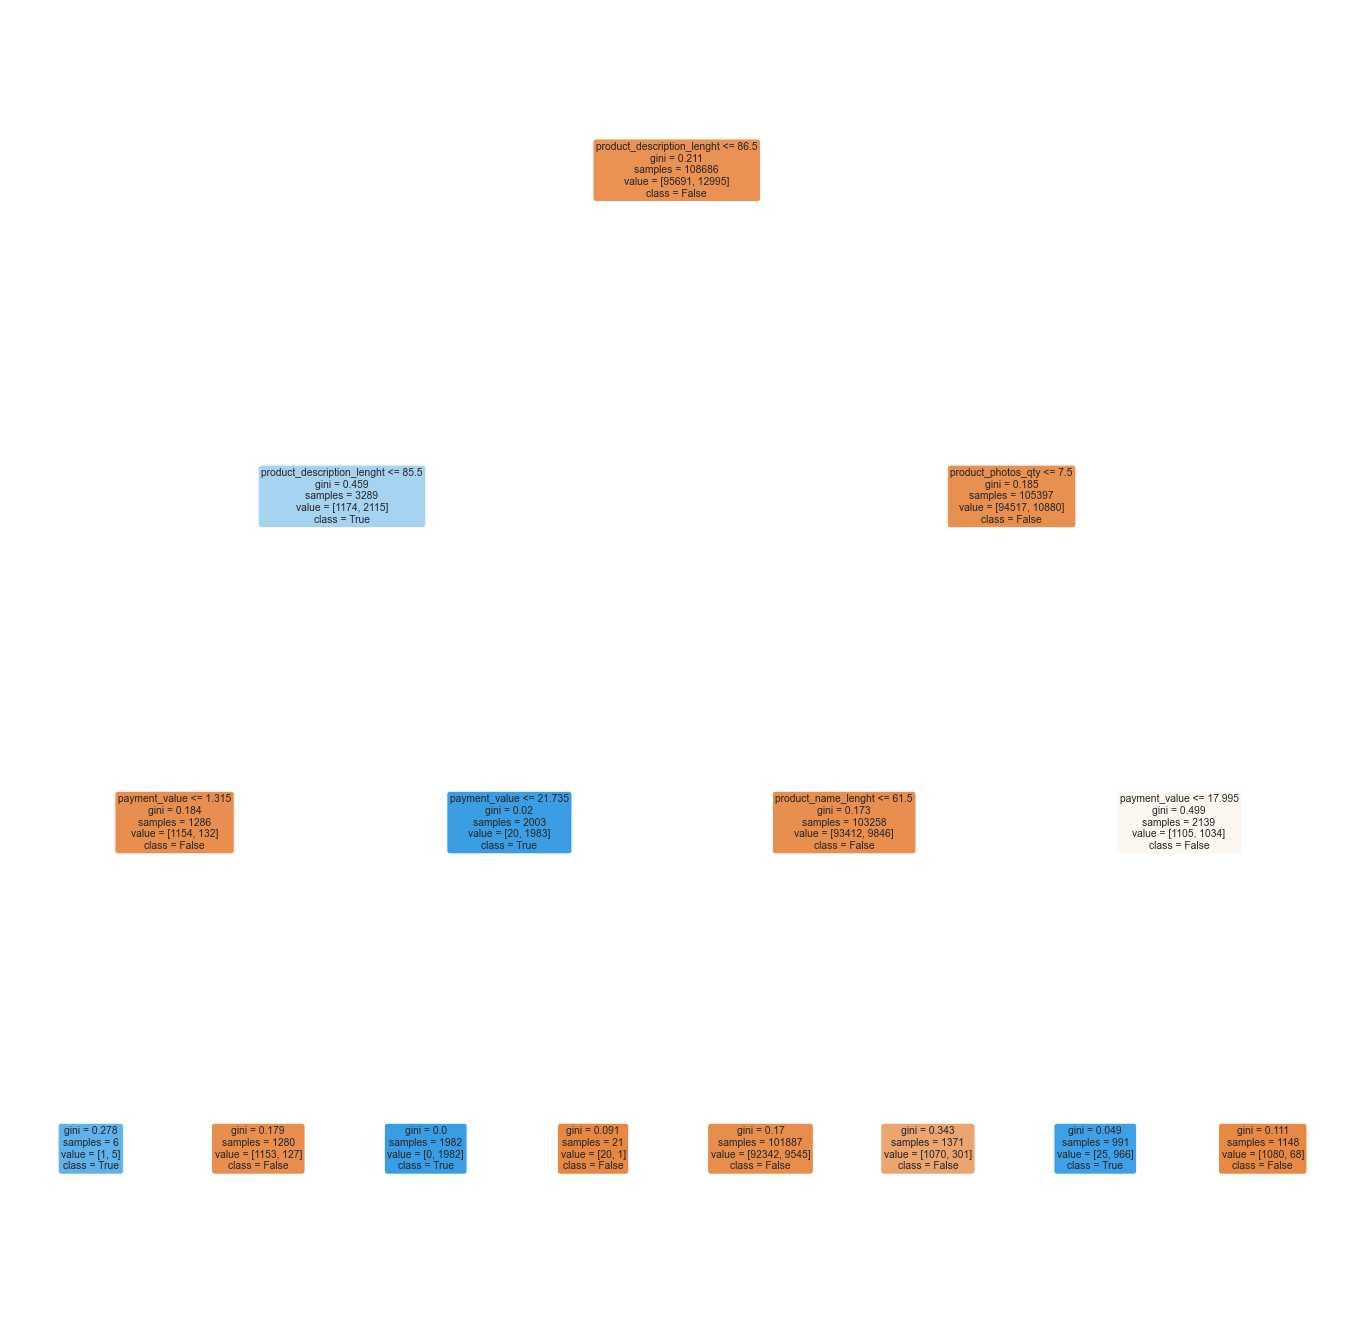

In [12]:
# Extract Response and Predictors
y = pd.DataFrame(finaldata['retained'])
X = pd.DataFrame(finaldata[['review_response_days','payment_value','product_description_lenght','review_score','product_name_lenght','product_photos_qty','delivery_time']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model


f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["False","True"])

## Accuracy measures for train dataset

Train Data
Accuracy  :	 0.9073661741162615

TPR Train :	 0.22724124663332051
TNR Train :	 0.9997282921068857

FPR Train :	 0.00027170789311429497
FNR Train :	 0.7727587533666795


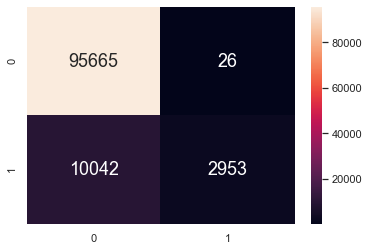

In [13]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Accuracy measures for test dataset

Test Data
Accuracy  :	 0.9027850616909106

TPR Test :	 0.22601232394366197
TNR Test :	 0.9998421966230078

FPR Test :	 0.00015780337699226762
FNR Test :	 0.773987676056338


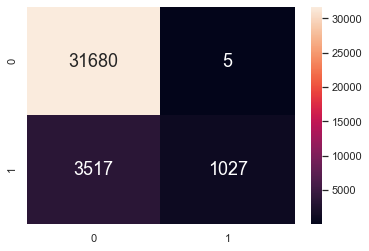

In [14]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})